In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
from category_encoders import OrdinalEncoder

df_cable = pd.read_excel("../data/raw/glaad/cable.xlsx")
df_cable = df_cable.rename(columns={'Unnamed: 0': 'index'})
df_cable["index"] = df_cable["index"].str.replace(" Characters", "")

df_streaming = pd.read_excel("../data/raw/glaad/streaming.xlsx")
df_streaming = df_streaming.rename(columns={'Unnamed: 0': 'Characters'})
df_streaming["Characters"] = df_streaming["Characters"].str.replace(" Characters", "")

# Cable TV Linear Regression

In [52]:
# Cleaning and transforming the data 
cable = df_cable.T
new_header = cable.iloc[0] #grab the first row for the header
cable = cable[1:] #take the data less the header row
cable.columns = new_header #set the header row as the df header
cable = cable.reset_index()
cable = cable.rename(columns={'index':'Year'})

[Text(0.5, 1.0, 'Transgendered Characters on Cable TV')]

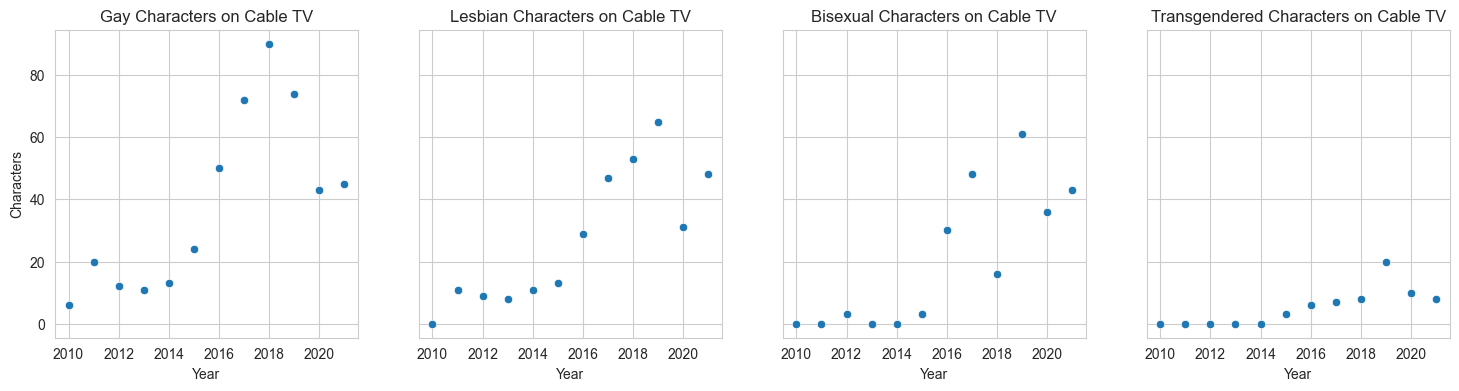

In [53]:
# Plotting the data
sns.set_style("whitegrid")
fig, axes = plt.subplots(ncols=4,nrows=1, figsize=(18,4), sharey=True)
sns.scatterplot(x=cable["Year"], y=cable["Gay"], ax=axes[0]).set(title='Gay Characters on Cable TV', ylabel='Characters')
sns.scatterplot(x=cable["Year"], y=cable["Lesbian "], ax=axes[1]).set(title='Lesbian Characters on Cable TV')
sns.scatterplot(x=cable["Year"], y=cable["Bisexual"], ax=axes[2]).set(title='Bisexual Characters on Cable TV')
sns.scatterplot(x=cable["Year"], y=cable["Transgendered"], ax=axes[3]).set(title='Transgendered Characters on Cable TV')

In [54]:
# Changing the dataset data types
cable['Year'] = cable['Year'].astype("object")
cable['Gay'] = cable['Gay'].astype("int64")
cable['Bisexual'] = cable['Bisexual'].astype("int64")
cable['Transgendered'] = cable['Transgendered'].astype("int64")
cable['Lesbian '] = cable['Lesbian '].astype("int64")

In [55]:
# Encoding the Year
encoder = OrdinalEncoder()
a = np.array(cable['Year']).reshape(-1,1)
cable['Year_encoded'] = encoder.fit_transform(a) 
cable

d:\anaconda3\envs\iteso\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
d:\anaconda3\envs\iteso\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)


index,Year,Gay,Lesbian,Bisexual,Transgendered,Year_encoded
0,2010,6,0,0,0,1
1,2011,20,11,0,0,2
2,2012,12,9,3,0,3
3,2013,11,8,0,0,4
4,2014,13,11,0,0,5
5,2015,24,13,3,3,6
6,2016,50,29,30,6,7
7,2017,72,47,48,7,8
8,2018,90,53,16,8,9
9,2019,74,65,61,20,10


In [56]:
# Establishing the x and y’s
x = np.array(cable["Year_encoded"]).reshape(-1,1)
y_gay = np.array(cable["Gay"]).reshape(-1,1)
y_les = np.array(cable["Lesbian "]).reshape(-1,1)
y_bi = np.array(cable["Bisexual"]).reshape(-1,1)
y_trans = np.array(cable["Transgendered"]).reshape(-1,1)

In [57]:
# Defining the optimization criteria 
def min_cuad(w,x,y):
  f=w[0]+w[1]*x            # lineal function
  return np.mean((f-y)**2) # mean of the errors, between the function and data, squared

w0=np.random.rand(2) # Initial condition. 2 random elements
opt_cable1 = minimize(min_cuad,w0,args=(x, y_gay))
f_gay = opt_cable1.x[0]+opt_cable1.x[1]*x

opt_cable2 = minimize(min_cuad,w0,args=(x, y_les))
f_les = opt_cable2.x[0]+opt_cable2.x[1]*x

opt_cable3 = minimize(min_cuad,w0,args=(x, y_bi))
f_bi = opt_cable3.x[0]+opt_cable3.x[1]*x

opt_cable4 = minimize(min_cuad,w0,args=(x, y_trans))
f_trans = opt_cable4.x[0]+opt_cable4.x[1]*x

In [65]:
opt_cable1

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 340.21989121989134
        x: [ 4.242e-01  5.832e+00]
      nit: 6
      jac: [-3.815e-06  3.815e-06]
 hess_inv: [[ 2.273e+00 -2.728e-01]
            [-2.728e-01  4.196e-02]]
     nfev: 24
     njev: 8

[Text(0.5, 1.0, 'Transgendered Characters on Cable TV')]

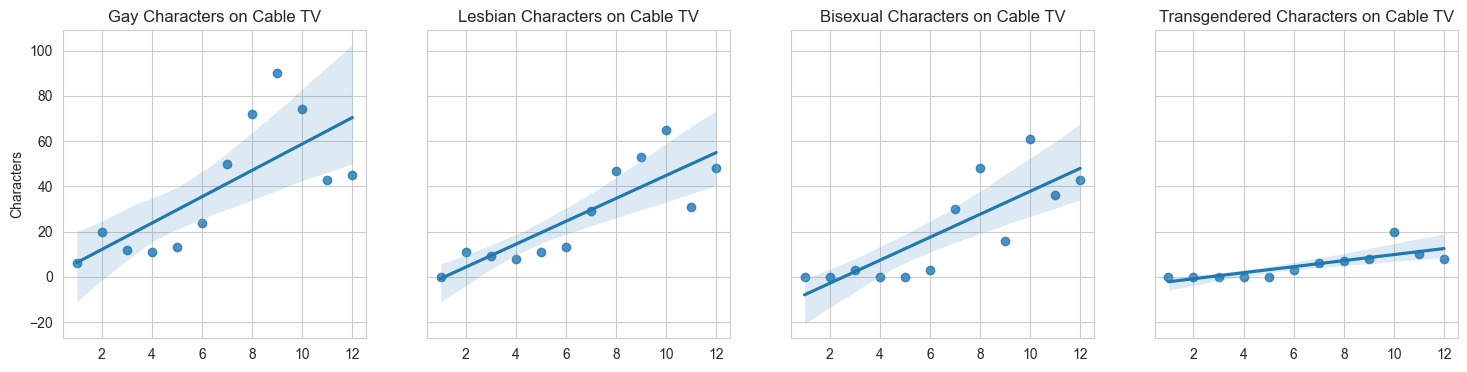

In [59]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(ncols=4,nrows=1, figsize=(18,4), sharey=True)
sns.regplot(x=x, y=y_gay, ax=axes[0]).set(title='Gay Characters on Cable TV', ylabel='Characters')
sns.regplot(x=x, y=y_les, ax=axes[1]).set(title='Lesbian Characters on Cable TV')
sns.regplot(x=x, y=y_bi, ax=axes[2]).set(title='Bisexual Characters on Cable TV')
sns.regplot(x=x, y=y_trans, ax=axes[3]).set(title='Transgendered Characters on Cable TV')

In [60]:
y_pred = model1.predict(x)

NameError: name 'model1' is not defined